Here, we will explore deep-learning models that can process text, timeseries, and sequence data in
general. The two fundamental deep-learning algorithms for sequence processing
are *recurrent neural networks* and *1D convnets*.

Applications of these algorithms include the following:
* Document classification and timeseries classification, such as identifying the
topic of an article or the author of a book
* Timeseries comparisons, such as estimating how closely related two documents or two stock tickers are
* Sequence-to-sequence learning, such as decoding an English sentence into
French
* Sentiment analysis, such as classifying the sentiment of tweets or movie reviews
as positive or negative
* Timeseries forecasting, such as predicting the future weather at a certain location, given recent weather data

## Working with text data

>None of thw deeplearning models we'll make in this sectiob truly understand text in a human sense; rather, these models can
map the statistical structure of written language, which is sufficient to solve many simple textual tasks. Deep learning for natural-language processing is pattern recognition
applied to words, sentences, and paragraphs, in much the same way that computer
vision is pattern recognition applied to pixels.

Like all other neural networks, deep-learning models don’t take as input raw text:
they only work with numeric tensors. Vectorizing text is the process of transforming text
into numeric tensors. This can be done in multiple ways:
* Segment text into words, and transform each word into a vector.
* Segment text into characters, and transform each character into a vector.
* Extract n-grams of words or characters, and transform each n-gram into a vector.
N-grams are overlapping groups of multiple consecutive words or characters.

Collectively, the different units into which you can break down text (words, characters, or n-grams) are called *tokens*, and breaking text into such tokens is called *tokenization*. There are multiple ways to
associate a vector with a token. In this section, we’ll present two major ones: *one-hot
encoding* of tokens, and *token embedding* (typically used exclusively for words, and called
*word embedding*).

![](img/05_01.png 'From text to tokens to vectors')

### Understanding n-grams and bag-of-words

Word n-grams are groups of N (or fewer) consecutive words that you can extract from
a sentence. The same concept may also be applied to characters instead of words.
Here’s a simple example. Consider the sentence “The cat sat on the mat.” It may be
decomposed into the following set of 2-grams:

`{"The", "The cat", "cat", "cat sat", "sat",
"sat on", "on", "on the", "the", "the mat", "mat"}`
It may also be decomposed into the following set of 3-grams:

`{"The", "The cat", "cat", "cat sat", "The cat sat",
"sat", "sat on", "on", "cat sat on", "on the", "the",
"sat on the", "the mat", "mat", "on the mat"}`

Such a set is called a bag-of-2-grams or bag-of-3-grams, respectively. The term bag
here refers to the fact that you’re dealing with a set of tokens rather than a list or
sequence: the tokens have no specific order. This family of tokenization methods is
called bag-of-words.

Because bag-of-words isn’t an order-preserving tokenization method, it tends to be used in shallow language-processing models rather than
in deep-learning models. We won't use this here, but note that they’re a powerful,
unavoidable feature-engineering tool when using lightweight, shallow text-processing
models such as logistic regression and random forests.

### One-hot encoding of words and characters

One-hot encoding is the most common, most basic way to turn a token into a vector. It consists of associating a unique integer index with every word
and then turning this integer index i into a binary vector of size N (the size of the
vocabulary); the vector is all zeros except for the i th entry, which is 1. Of course, one-hot encoding can be done at the character level, as well. 

#### Word-level one-hot encoding

Let's see a toy example of word-level one-hot encoding:

In [1]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [2]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

#### Character-level one-hot encoding

Here is a toy example of character-level one-hot encoding:

In [3]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [4]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

Note that Keras has built-in utilities for doing one-hot encoding of text at the word level
or character level, starting from raw text data.

In [5]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [6]:
sequences, one_hot_results

([[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]],
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]))

### Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense
word vectors, also called *word embeddings*. Whereas the vectors obtained through one-hot
encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same
dimensionality as the number of words in the vocabulary), word embeddings are lowdimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors). Unlike the word vectors obtained via one-hot encoding, word
embeddings are learned from data. It’s common to see word embeddings that are
256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large
vocabularies.

There are two ways to obtain word embeddings:
* Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors in the same way you learn the
weights of a neural network.
* Load into your model word embeddings that were precomputed using a different machine-learning task than the one you’re trying to solve. These are called
pretrained word embeddings.

#### LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER

The simplest way to associate a dense vector with a word is to choose the vector at
random. The problem with this approach is that the resulting embedding space has
no structure: for instance, the words *accurate* and *exact* may end up with completely
different embeddings, even though they’re interchangeable in most sentences.

The geometric relationships between word vectors
should reflect the semantic relationships between these words. Word embeddings are
meant to map human language into a geometric space. For instance, in a reasonable
embedding space, you would expect synonyms to be embedded into similar word vectors; and in general, you would expect the geometric distance (such as L2 distance)
between any two word vectors to relate to the semantic distance between the associated words.

![](img/05_02.png 'Word embeddings')

>In real-world word-embedding spaces, common examples of meaningful geometric transformations are “gender”
vectors and “plural” vectors. For instance, by adding a “female” vector to the vector
“king,” we obtain the vector “queen.” By adding a “plural” vector, we obtain “kings.”
Word-embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

What makes a good word-embedding space depends heavily on your task:
the perfect word-embedding space for an English-language movie-review sentimentanalysis model may look different from the perfect embedding space for an English language legal-document-classification model, because the importance of certain
semantic relationships varies from task to task.
It’s thus reasonable to learn a new embedding space with every new task. Fortunately, backpropagation makes this easy, and Keras makes it even easier. It’s about
learning the weights of a layer: the `Embedding` layer.

In [7]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

The `Embedding` layer is best understood as a dictionary that maps integer indices
(which stand for specific words) to dense vectors. It takes integers as input, it looks up
these integers in an internal dictionary, and it returns the associated vectors.

$\text{Word index}\rightarrow \text{Embedding layer}\rightarrow \text{Corresponding word vector}$

The Embedding layer takes as input a 2D tensor of integers, of shape `(samples,
sequence_length)`, where each entry is a sequence of integers. It can embed
sequences of variable lengths: for instance, you could feed into the Embedding layer in
the previous example batches with shapes `(32, 10)` (batch of 32 sequences of length
10) or `(64, 15)` (batch of 64 sequences of length 15). All sequences in a batch must
have the same length, though (because you need to pack them into a single tensor),
so sequences that are shorter than others should be padded with zeros, and sequences
that are longer should be truncated.
This layer returns a 3D floating-point tensor of shape `(samples, sequence_
length, embedding_dimensionality)`. Such a 3D tensor can then be processed by
an RNN layer or a 1D convolution layer.

Let’s apply this idea to the IMDB movie-review sentiment-prediction task. You’ll restrict the
movie reviews to the top 10,000 most common words (as you did the first time you
worked with this dataset) and cut off the reviews after only 20 words. The network will
learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the
tensor to 2D, and train a single `Dense` layer on top for classification.

In [8]:
#Loading the IMDB data for use with an Embedding layer
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

#Turn the lists of integers into a 2D integer tensor of shape
(samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

In [10]:
#Using an Embedding layer and classifier on the IMDB data
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 9s 9ms/step - loss: 0.6848 - acc: 0.5830 - val_loss: 0.6207 - val_acc: 0.7024
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5711 - acc: 0.7422 - val_loss: 0.5305 - val_acc: 0.7344
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4733 - acc: 0.7827 - val_loss: 0.5032 - 

You get to a validation accuracy of ~75%, which is pretty good considering that you’re
only looking at the first 20 words in every review. But note that merely flattening the
embedded sequences and training a single Dense layer on top leads to a model that
treats each word in the input sequence separately, without considering inter-word
relationships and sentence structure (for example, this model would likely treat both
“this movie is a bomb” and “this movie is the bomb” as being negative reviews). It’s
much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.

#### USING PRETRAINED WORD EMBEDDINGS

Sometimes, you have so little training data available that you can’t use your data
alone to learn an appropriate task-specific embedding of your vocabulary.

Instead of learning word embeddings jointly with the problem you want to solve,
you can load embedding vectors from a precomputed embedding space that you
know is highly structured and exhibits useful properties—that captures generic
aspects of language structure. This is similar to how we used pretrained CNN for image classification.

There are various precomputed databases of word embeddings that you can download and use in a Keras Embedding layer. **Word2vec** is one of them. Another popular
one is called *Global Vectors for Word Representation* **GloVe**.

### Putting it all together: from raw text to word embeddings

You'll use the same model as before but you’ll do
so using pretrained word embeddings; and instead of using the pretokenized IMDB
data packaged in Keras, you’ll start from scratch by downloading the original text data.

#### DOWNLOADING THE IMDB DATA AS RAW TEXT


The data can be downloaded from: http://mng.bz/0tIo

Now, let’s collect the individual training reviews into a list of strings, one string per
review. You’ll also collect the review labels (positive/negative) into a labels list.

In [13]:
import os
imdb_dir = '/Users/harik/Downloads/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [19]:
texts[0], labels[0]

("Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 0)

In [40]:
len(texts)

25000

#### TOKENIZING THE DATA

Let’s vectorize the text and prepare a training and validation split, using the concepts
introduced earlier in this section. You'll be restricting the training data to the first 200 samples. So you’ll learn to classify movie
reviews after looking at just 200 examples."

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### DOWNLOADING THE GLOVE WORD EMBEDDINGS


Go to https://nlp.stanford.edu/projects/glove, and download the precomputed
embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip,
containing 100-dimensional embedding vectors for 400,000 words (or nonword
tokens).

#### PREPROCESSING THE EMBEDDINGS

Let’s parse the unzipped file (a .txt file) to build an index that maps words (as strings)
to their vector representation (as number vectors).

In [29]:
glove_dir = '/Users/harik/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Next, you’ll build an embedding matrix that you can load into an Embedding layer. It
must be a matrix of shape `(max_words, embedding_dim)`, where each entry i contains
the `embedding_dim` -dimensional vector for the word of index i in the reference word
index (built during tokenization).

In [30]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [55]:
embedding_matrix[8]

array([ 0.085703  , -0.22201   ,  0.16569   ,  0.13372999,  0.38238999,
        0.35400999,  0.01287   ,  0.22461   , -0.43816999,  0.50164002,
       -0.35874   , -0.34983   ,  0.055156  ,  0.69647998, -0.17958   ,
        0.067926  ,  0.39100999,  0.16039   , -0.26635   , -0.21138   ,
        0.53697997,  0.49379   ,  0.93660003,  0.66902   ,  0.21793   ,
       -0.46641999,  0.22383   , -0.36204001, -0.17656   ,  0.17479999,
       -0.20367   ,  0.13931   ,  0.019832  , -0.10413   , -0.20243999,
        0.55002999, -0.15459999,  0.98654997, -0.26863   , -0.29089999,
       -0.32866001, -0.34187999, -0.16943   , -0.42001   , -0.046727  ,
       -0.16327   ,  0.70823997, -0.74910998, -0.091559  , -0.96178001,
       -0.19746999,  0.10282   ,  0.55220997,  1.38160002, -0.65635997,
       -3.25020003, -0.31556001, -1.20550001,  1.77090001,  0.40259999,
       -0.79826999,  1.15970004, -0.33041999,  0.31382   ,  0.77385998,
        0.22595   ,  0.52471   , -0.034053  ,  0.32047999,  0.07

#### DEFINING A MODEL

You’ll use the same model architecture as before.

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### LOADING THE GLOVE EMBEDDINGS IN THE MODEL
The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is
the word vector meant to be associated with index i. Simple enough. Load the GloVe
matrix you prepared into the Embedding layer, the first layer in the model.

In [34]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Additionally, you’ll freeze the Embedding layer (set its trainable attribute to False),
following the same rationale you’re already familiar with in the context of pretrained
convnet features.

In [35]:
model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
history = model.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 9s 620ms/step - loss: 1.3156 - acc: 0.5741 - val_loss: 0.7184 - val_acc: 0.5202
Epoch 2/10
7/7 [==============================] - 3s 508ms/step - loss: 0.6131 - acc: 0.6881 - val_loss: 0.7185 - val_acc: 0.5242
Epoch 3/10
7/7 [==============================] - 3s 477ms/step - loss: 0.4058 - acc: 0.8657 - val_loss: 0.8115 - val_acc: 0.5065
Epoch 4/10
7/7 [==============================] - 3s 505ms/step - loss: 0.2995 - acc: 0.8862 - val_loss: 0.8664 - val_acc: 0.5080
Epoch 5/10
7/7 [==============================] - 3s 492ms/step - loss: 0.2226 - acc: 0.9442 - val_loss: 1.6771 - val_acc: 0.4970
Epoch 6/10
7/7 [==============================] - 3s 528ms/step - loss: 0.2956 - acc: 0.8770 - val_loss: 1.3361 - val_acc: 0.5061
Epoch 7/10
7/7 [==============================] - 3s 499ms/step - loss: 0.1795 - acc: 0.9243 - val_loss: 0.7846 - val_acc: 0.5471
Epoch 8/10
7/7 [==============================] - 3s 495ms/step - loss: 0.0485 - acc: 1.00

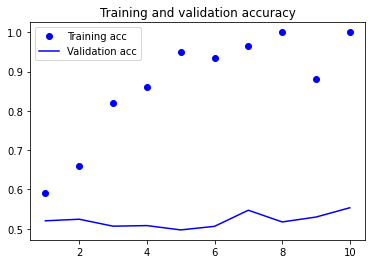

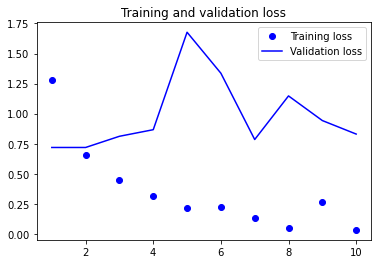

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of
training samples. Validation accuracy has high variance for the same reason, but it
seems to reach the high 50s. This might seem that the word embedding is not performing well, be note that we have used just 200 samples. To make a fair comparison, let's use the same number of data on the prevoius model.

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 8s 644ms/step - loss: 0.6897 - acc: 0.5213 - val_loss: 0.6937 - val_acc: 0.5078
Epoch 2/10
7/7 [==============================] - 3s 519ms/step - loss: 0.4656 - acc: 0.9679 - val_loss: 0.6963 

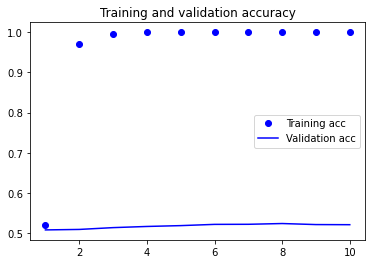

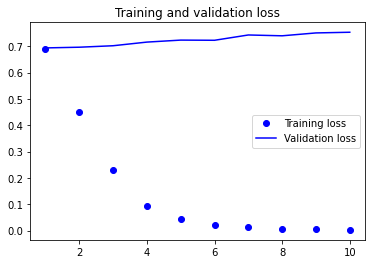

In [38]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As you can see, the accuracy even here is just about the same as the previous model. Let's use more data to see if the model will improve.

In [58]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 1000
training_samples = 20000 #Changing 200 to 20000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 1000)
Shape of label tensor: (25000,)


In [59]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [60]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
history = model.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model_more_data.h5')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1000, 100)         1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                3200032   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 4,200,065
Trainable params: 4,200,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 33s 48ms/step - loss: 0.7612 - acc: 0.5027 - val_loss: 0.6934 - val_acc: 0.4908
Epoch 2/10
625/625 [==============================] - 33s 53ms/step - loss: 0.7027 - acc: 0.5075 - val_loss:

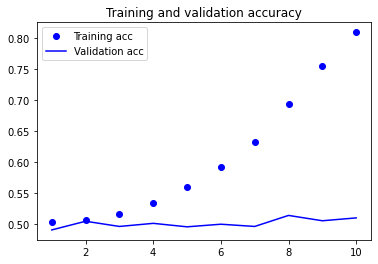

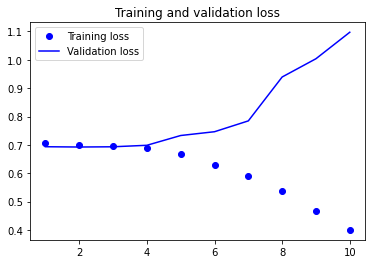

In [61]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [47]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 15s 17ms/step - loss: 0.6940 - acc: 0.5057 - val_loss: 0.6936 - val_acc: 0.5056
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.5016 - acc: 0.7899 - val_loss:

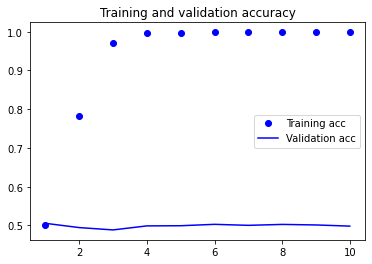

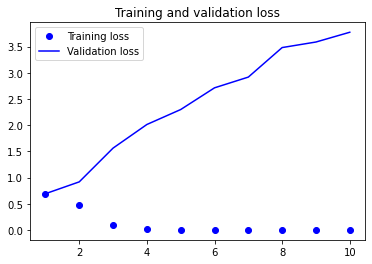

In [48]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Okay, not good!

Finally, let’s evaluate the model on the test data. First, you need to tokenize the test
data.

In [64]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [65]:
model.load_weights('pre_trained_glove_model_more_data.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 9ms/step - loss: 1.1458 - acc: 0.4868


[1.1458252668380737, 0.48684000968933105]

Just about 49% of accuracy. This is worse then just guessing.

## Understanding recurrent neural networks

A major characteristic of all neural networks you’ve seen so far, such as densely connected networks and convnets, is that they have no memory. Each input shown to
them is processed independently, with no state kept in between inputs.

Biological intelligence processes information incrementally while maintaining an
internal model of what it’s processing, built from past information and constantly
updated as new information comes in.

A recurrent neural network (RNN) adopts the same principle, albeit in an extremely
simplified version: it processes sequences by iterating through the sequence elements
and maintaining a state containing information relative
to what it has seen so far.

The state of the RNN is reset between processing two different, independent sequences (such as two different
IMDB reviews), so you still consider one sequence a single data point: a single input to the network. What
changes is that this data point is no longer processed in a
single step; rather, the network internally loops over
sequence elements.

To make these notions of loop and state clear, let’s implement the forward pass of a
toy RNN in Numpy. This RNN takes as input a sequence of vectors, which you’ll encode
as a 2D tensor of size (timesteps, input_features). It loops over timesteps, and at
each timestep, it considers its current state at t and the input at t (of shape (input_
features,), and combines them to obtain the output at t. You’ll then set the state for
the next step to be this previous output. For the first timestep, the previous output
isn’t defined; hence, there is no current state. So, you’ll initialize the state as an allzero vector called the initial state of the network.

In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [4]:
final_output_sequence

array([0.99999963, 0.99999998, 1.        , ..., 1.        , 1.        ,
       1.        ])

Easy enough: in summary, an RNN is a for loop that reuses quantities computed
during the previous iteration of the loop, nothing more. Of course, there are many
different RNNs fitting this definition that you could build

![](img/05_03.png)

>In this example, the final output is a 2D tensor of shape (timesteps,
output_features), where each timestep is the output of the loop at time t.
Each timestep t in the output tensor contains information about timesteps 0
to t in the input sequence—about the entire past. For this reason, in many
cases, you don’t need this full sequence of outputs; you just need the last output (output_t at the end of the loop), because it already contains information about the entire sequence.

### A recurrent layer in Keras

The above numpy implementation can be done in Keras using `SimpleRNN` layer.

In [11]:
from keras.layers import SimpleRNN

However, like all other
Keras layers, not a single sequence as in the Numpy example. This means it takes inputs
of shape (batch_size, timesteps, input_features), rather than (timesteps,
input_features).

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it
can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)) or only the last output for
each input sequence (a 2D tensor of shape (batch_size, output_features)). These
two modes are controlled by the `return_sequences` constructor argument. 

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


The following example returns the full state sequence:

In [13]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It’s sometimes useful to stack several recurrent layers one after the other in order to
increase the representational power of a network. In such a setup, you have to get all
of the intermediate layers to return full sequence of outputs:

In [14]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now, let’s use such a model on the IMDB movie-review-classification problem. First,
preprocess the data.

In [15]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let’s train a simple recurrent network using an `Embedding` layer and a `SimpleRNN`
layer.

In [16]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 51s 238ms/step - loss: 0.6680 - acc: 0.5740 - val_loss: 0.4353 - val_acc: 0.8144
Epoch 2/10
157/157 [==============================] - 41s 262ms/step - loss: 0.3944 - acc: 0.8358 - val_loss: 0.4109 - val_acc: 0.8316
Epoch 3/10
157/157 [==============================] - 41s 261ms/step - loss: 0.2846 - acc: 0.8885 - val_loss: 0.3392 - val_acc: 0.8606
Epoch 4/10
157/157 [==============================] - 39s 247ms/step - loss: 0.2338 - acc: 0.9116 - val_loss: 0.6034 - val_acc: 0.8070
Epoch 5/10
157/157 [==============================] - 41s 264ms/step - loss: 0.1753 - acc: 0.9369 - val_loss: 0.4005 - val_acc: 0.8658
Epoch 6/10
157/157 [==============================] - 40s 253ms/step - loss: 0.1299 - acc: 0.9558 - val_loss: 0.4014 - val_acc: 0.8640
Epoch 7/10
157/157 [==============================] - 39s 249ms/step - loss: 0.0975 - acc: 0.9670 - val_loss: 0.5581 - val_acc: 0.7982
Epoch 8/10
157/157 [==============================] - 3

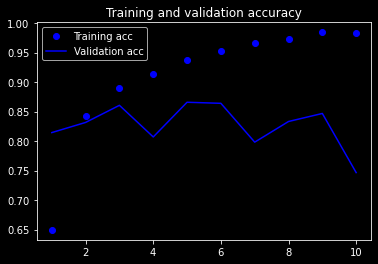

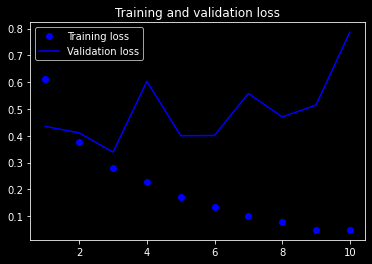

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Previously the first naive approach to this dataset got you to a test
accuracy of 88%. Unfortunately, this small recurrent network doesn’t perform well
compared to this baseline (only 85% validation accuracy). Part of the problem is that
your inputs only consider the first 500 words, rather than full sequences—hence, the
RNN has access to less information than the earlier baseline model. The remainder of
the problem is that `SimpleRNN` isn’t good at processing long sequences, such as text.

### Understanding the LSTM and GRU layers

`SimpleRNN` isn’t the only recurrent layer available in Keras. There are two others: LSTM
and `GRU`. In practice, you’ll always use one of these, because `SimpleRNN` is generally too
simplistic to be of real use. `SimpleRNN` has a major issue: although it should theoretically
be able to retain at time t information about inputs seen many timesteps before, in
practice, such long-term dependencies are impossible to learn. This is due to the vanishing gradient problem.

The `LSTM` and `GRU` layers are designed to solve this problem. `LSTM` layer is a variant of the `SimpleRNN` layer; it adds a way
to carry information across many timesteps. Imagine a conveyor belt running parallel
to the sequence you’re processing. Information from the sequence can jump onto the
conveyor belt at any point, be transported to a later timestep, and jump off, intact,
when you need it. This is essentially what LSTM does: it saves information for later,
thus preventing older signals from gradually vanishing during processing. This is known as the carry.

![](img/05_04.png)

The way carry is calculated is a bit complex. It involves
three distinct transformations. All three have the form of a `SimpleRNN` cell:
```
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
C_t = f_t * C_t-1 + i_t * k_t
```

### LSTM on IMDB Dataset

In [18]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 117s 680ms/step - loss: 0.6040 - acc: 0.6719 - val_loss: 0.4446 - val_acc: 0.8030
Epoch 2/10
157/157 [==============================] - 119s 757ms/step - loss: 0.3067 - acc: 0.8793 - val_loss: 0.3194 - val_acc: 0.8656
Epoch 3/10
157/157 [==============================] - 101s 646ms/step - loss: 0.2302 - acc: 0.9153 - val_loss: 0.3354 - val_acc: 0.8824
Epoch 4/10
157/157 [==============================] - 97s 617ms/step - loss: 0.1845 - acc: 0.9369 - val_loss: 0.3274 - val_acc: 0.8858
Epoch 5/10
157/157 [==============================] - 102s 648ms/step - loss: 0.1694 - acc: 0.9399 - val_loss: 0.3110 - val_acc: 0.8734
Epoch 6/10
157/157 [==============================] - 98s 626ms/step - loss: 0.1524 - acc: 0.9471 - val_loss: 0.3924 - val_acc: 0.8418
Epoch 7/10
157/157 [==============================] - 102s 647ms/step - loss: 0.1317 - acc: 0.9537 - val_loss: 0.3180 - val_acc: 0.8912
Epoch 8/10
157/157 [==============================

## Advanced use of recurrent neural networks

Here, we’ll review three advanced techniques for improving the performance and generalization power of recurrent neural networks.
* *Recurrent dropout*—This is a specific, built-in way to use dropout to fight overfitting in recurrent layers.
* *Stacking recurrent layers*—This increases the representational power of the network (at the cost of higher computational loads).
* *Bidirectional recurrent* layers—These present the same information to a recurrent
network in different ways, increasing accuracy and mitigating forgetting issues.